In [154]:
from textblob import TextBlob
import pickle
import emoji
import numpy as np
import seaborn as sns

In [3]:
def load_data(filename):
    a_file = open(filename, "rb")
    output = pickle.load(a_file)
    a_file.close()
    return output

In [184]:
def find_sentiment(polarity):
    if polarity > 0 :
        prediction = 'positive'
    elif polarity < 0 :
        prediction = 'negative'
    else:
        prediction = 'neutral'
        
    return prediction

In [4]:
data = load_data('sentiment_data_train.pkl')

In [147]:
lengths = {'positive':[], 'negative':[], 'neutral':[]}
for i, (_, tweet, label) in enumerate(data):
    lengths[label].append(len(tweet))

In [153]:
print('Mean lengths')
for sent in lengths:
    print(sent, np.mean(np.array(lengths[sent])))
    
print()
print('Max lengths')
for sent in lengths:
    print(sent, np.max(np.array(lengths[sent])))

Mean lengths
positive 126.00647388864911
negative 131.15212091662605
neutral 124.70307750759878

Max lengths
positive 174
negative 162
neutral 179


In [ ]:
#lenghts have to apparent pattern. Its also because the max lenght is capped around 150

In [162]:
lengths = []
for i, (_, tweet, label) in enumerate(data):
    lengths.append(len(tweet))

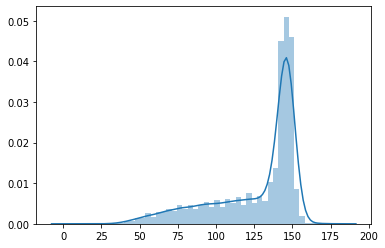

In [163]:
sns.distplot(np.array(lengths))

In [157]:
#lenght distribution shows that the data is cut off at around length of 150

In [179]:
counter = 0
lengths = {'positive':[], 'negative':[], 'neutral':[]}
for i, (_, tweet, label) in enumerate(data):
    if len(tweet) < 100:
        counter += 1
        lengths[label].append(len(tweet))
        
print(counter/14000)

0.18707142857142858


In [180]:
print('Mean lengths')
for sent in lengths:
    print(sent, np.mean(np.array(lengths[sent])))
    
print()
print('std lengths')
for sent in lengths:
    print(sent, np.std(np.array(lengths[sent])))

Mean lengths
positive 76.24665178571429
negative 80.08228980322004
neutral 75.6786941580756

std lengths
positive 15.485105529306114
negative 14.540807709800797
neutral 15.694950476498017


In [175]:
#sentiments dont seem to depend upon lengths for any subset of dataset

In [14]:
correct = 0
counter = 0
for i, (_, tweet, label) in enumerate(data):
    #if label != 'neutral':
    counter += 1
    polarity = TextBlob(tweet).sentiment.polarity
    if polarity > 0 :
        prediction = 'positive'
    elif polarity < 0 :
        prediction = 'negative'
    else:
        prediction = 'neutral'

    if prediction == label:
        correct += 1

In [15]:
correct/counter

0.45071428571428573

In [145]:
#text blob isnt as good

In [29]:
counter = 0
positive = []
negative = []
neutral = []
for i, (_, tweet, label) in enumerate(data):
    all_emojis = []
    for l in tweet:
        if l in emoji.UNICODE_EMOJI:
            if label == 'positive':
                positive.append(l)
            elif label == 'negative':
                negative.append(l)
            else:
                neutral.append(l)

In [42]:
####20% of the dataset has emojis. Can extract a lot of information from there

In [133]:
counter = 0
mentions = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    for l in tweet:
        if l == '@':
            mentions[label] += 1
            break
            
total_mentions = sum(list(mentions.values()))

In [134]:
for key in mentions:
    mentions[key] /= total_mentions

In [135]:
mentions

{'positive': 0.3259173905335933,
 'negative': 0.3053536606984577,
 'neutral': 0.3687289487679489}

In [136]:
#mentions of people have roughly the same disribution for the tweets

In [52]:
counter = 0
mentions = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    for l in tweet:
        if l == '#':
            mentions[label] += 1
            break
            
total_mentions = sum(list(mentions.values()))

In [55]:
for key in mentions:
    mentions[key] /= total_mentions

In [56]:
mentions

{'positive': 0.49262536873156343,
 'negative': 0.1261061946902655,
 'neutral': 0.3812684365781711}

In [57]:
#####hastags are mostly not used for negative sentiment

In [182]:
counter = 0
mentions = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    for j, l in enumerate(tweet):
        if l == '#':
            print(tweet[j:j+2])
            
total_mentions = sum(list(mentions.values()))

['#', 'deshkamahatyohar']
['#', 'videsh']
['#', 'JaiShriRam']
['#', 'SecretOfPositivity']
['#', 'jcb']
['#', 'JCBKiKudhayi']
['#', 'JCBkiKhudaai']
['#', 'SRGMPLilChamps']
['#', 'BharatThisEid']
['#', 'Bharat']
['#', 'loveuSalman']
['#', 'HeroWaliEntry']
['#', 'ShaheerSheikh']
['#', 'YehRishteyHainPyaar']
['#', 'ChandigarhAmritsarChandigarh']
['#', 'ynwa']
['#', 'Dharan']
['#', 'HappyBirthdaySonakshiSinha']
['#', 'UCLFinal']
['#', 'delhi']
['#', 'MamataBanrjee']
['#', 'ModiIsNoDivider']
['#', 'timemagazine']
['#', 'ZsaZsaPadillaDiva2DivaUSTour']
['#', 'Jay']
['#', 'https']
['#', 'surat']
['#', 'MSDyn365']
['#', 'Dhoni']
['#', 'Thala']
['#', 'WelfareByDSSVolunteers']
['#', 'WC']
['#', 'BHARAT']
['#', 'ageBeeka']
['#', 'Smule']
['#', 'RadhaMohanSingh']
['#', 'pennenggrad']
['#', 'BoloGuruji']
['#', 'SaturdayMotivation']
['#', 'PAKvWI']
['#', 'WIvPak']
['#', 'Power']
['#', 'TehtulLafz']
['#', 'Salma']
['#', 'Jihadi']
['#', 'ParthSamthaan']
['#', 'Jumma']
['#', 'Mubarak']
['#', 'FakeCases']

['#', 'miss']
['#', 'Stokes']
['#', 'ENGSA']
['#', 'KudiyeNi']
['#', 'Week']
['#', 'Ramadan']
['#', 'PledgeAgainstCorruption']
['#', 'TVF']
['#', 'Article15ShockTrailer']
['#', 'BrothersDay']
['#', 'UnlockYourInnerPower']
['#', 'WorldCup2019']
['#', 'Blizzney']
['#', 'RashtraNayakModi']
['#', 'ABPresults2019']
['#', 'Comali']
['#', 'Institute']
['#', 'Uttarakhand']
['#', 'Medical']
['#', 'Coaching']
['#', 'coaching']
['#', 'RAMADAN']
['#', 'RAMJAAN']
['#', 'NandaDevi']
['#', 'Sunandadevi']
['#', 'IRF']
['#', 'Bajaateraho']
['#', 'BestNetwork']
['#', 'govt']
['#', 'jumla']
['#', 'bjp']
['#', 'sarkar']
['#', 'jumle']
['#', 'RanbirRajKapoor']
['#', 'maukamauka']
['#', 'WorldCup2019']
['#', 'WorldCup']
['#', 'ContestA']
['#', 'Sita']
['#', 'Pakistan']
['#', 'MOM']
['#', 'Bikebotscam']
['#', 'BHARAT']
['#', 'RSSBLDC2018TYPING']
['#', 'BGT']
['#', 'Kerala']
['#', 'PAKvWI']
['#', 'Jaipur']
['#', 'Amberfort']
['#', 'JalMahal']
['#', 'HawaMahal']
['#', 'BilalAbbasOnJeetoPakistan']
['#', 'HRD']


['#', 'seeyoutomorrow']
['#', 'Kyungs']
['#', 'TeamIndia']
['#', 'CWC19']
['#', 'BachpanKahan']
['#', 'HimeshReshammiya']
['#', 'AtulChutri']
['#', 'GOOD']
['#', 'ITSNEWDAYHAPPY']
['#', 'SAT']
['#', 'STAY']
['#', 'Her']
['#', 'everythingisgoingtobealright']
['#', 'Bharat']
['#', 'StrongerTogether']
['#', 'Bharat']
['#', 'IAmBharat']
['#', 'Promotions']
['#', 'MCM']
['#', 'NGK']
['#', 'BeWise']
['#', 'YehUnDinonKiBaatHai']
['#', 'SamainaInMumbai']
['#', 'askstarsports']
['#', '60MillionStandWithMSG']
['#', 'tea']
['#', 'AugmontCheer']
['#', 'SkyShowPoll']
['#', 'PRIDE']
['#', 'BabyViviDay']
['#', 'HappyViviDay']
['#', 'Shri']
['#', 'ShankarLalwani']
['#', 'bahut']
['#', 'bahut']
['#', 'badhai']
['#', 'subhkamnaye']
['#', 'Indore']
['#', 'ModiPhirSe']
['#', 'ElectionResults2019']
['#', 'BharatThisEid']
['#', 'WorldVictoriousSaint']
['#', 'maukamauka']
['#', 'Namaz']
['#', 'Namaz']
['#', '4DaysForBharat']
['#', 'behirfeels']
['#', 'CWC19']
['#', 'surgicalstrikes']
['#', 'ayushman']
['#', 

In [183]:
#this shows the different kinds of hashtags people use

In [185]:
counter = 0
correct = 0
mentions = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    hashtags = ''
    
    for j, l in enumerate(tweet):
        if l == '#':
            hashtags += tweet[j+1] + ' '
      
    if len(hashtags) > 0:
        counter += 1
        hashtags = hashtags[:-1]
        polarity = TextBlob(hashtags).sentiment.polarity
        prediction = find_sentiment(polarity)
        
        if label != 'neutral' and prediction == label:
            correct += 1

In [186]:
correct, counter

(18, 1313)

In [187]:
#finding sentiments using hashtags using textblob. Horrible performance

In [69]:
too_long = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    tweet = [ord(l) for l in tweet if len(l) == 1]
    if 8230 in tweet:
        too_long[label] += 1

In [70]:
too_long

{'positive': 2432, 'negative': 2378, 'neutral': 2758}

In [74]:
####roughly equal number of too long tweets. 

In [127]:
too_long_counter = 0
followed_by_link= 0
end_at_too_long = 0
not_followed_by_link = 0
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    check = [(ord(l),j) for j,l in enumerate(tweet) if len(l) == 1]
    
    #check if ... is in the tweet
    if len(check) > 0:
        if 8230 in np.array(check)[:,0]:
            too_long_counter += 1
            index = np.where(np.array(check)[:,0] == 8230)[0][0]
            too_long_index = check[index][1]

            if len(tweet) == too_long_index+1:
                end_at_too_long += 1
            elif len(tweet) > too_long_index + 1 and tweet[too_long_index+1] == 'https':
                followed_by_link += 1
            else:
                not_followed_by_link += 1

In [128]:
too_long_counter, end_at_too_long, followed_by_link, not_followed_by_link

(7568, 1416, 6143, 9)

In [129]:
#there are 7.5 k sentences that are too long. 1416 end at being too long. 
#6143 are followed by a link. We probably want to remove that link. But we also want to see what goes on there

In [137]:
#Looking at sentiments of sentences that end at ...
end_at_too_long_sentiment = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    check = [(ord(l),j) for j,l in enumerate(tweet) if len(l) == 1]
    
    #check if ... is in the tweet
    if len(check) > 0:
        if 8230 in np.array(check)[:,0]:
            too_long_counter += 1
            index = np.where(np.array(check)[:,0] == 8230)[0][0]
            too_long_index = check[index][1]

            if len(tweet) == too_long_index+1:
                end_at_too_long_sentiment[label] += 1

In [142]:
total_mentions = sum(list(end_at_too_long_sentiment.values()))
for key in end_at_too_long_sentiment:
    end_at_too_long_sentiment[key] /= total_mentions
end_at_too_long_sentiment

{'positive': 0.4745762711864407,
 'negative': 0.1638418079096045,
 'neutral': 0.3615819209039548}

In [139]:
## end at too long sentiment are usually not negative

In [140]:
#Looking at sentiments of sentences that end at ...
followed_by_link_sentiment = {'positive':0, 'negative':0, 'neutral':0}
for i, (_, tweet, label) in enumerate(data):
    tweet = tweet.split()
    check = [(ord(l),j) for j,l in enumerate(tweet) if len(l) == 1]
    
    #check if ... is in the tweet
    if len(check) > 0:
        if 8230 in np.array(check)[:,0]:
            too_long_counter += 1
            index = np.where(np.array(check)[:,0] == 8230)[0][0]
            too_long_index = check[index][1]

            if len(tweet) > too_long_index + 1 and tweet[too_long_index+1] == 'https':
                followed_by_link_sentiment[label] += 1

In [143]:
total_mentions = sum(list(followed_by_link_sentiment.values()))
for key in followed_by_link_sentiment:
    followed_by_link_sentiment[key] /= total_mentions
followed_by_link_sentiment

{'positive': 0.28552824352922024,
 'negative': 0.34934071300667424,
 'neutral': 0.36513104346410546}

In [144]:
### not much information here for when a link is provided after too long